In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE


In [20]:
def plot_cluster(x,y,x_axis,y_axis,colors,title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x, y, color=colors, s=5)
    ax.set_xlabel(x_axis, size=15)
    ax.set_ylabel(y_axis, size=15)
    ax.set_xticklabels(ax.get_xticks(), size=12)
    ax.set_yticklabels(ax.get_yticks(), size=12)
    ax.spines["top"].set_visible(False);
    ax.spines["right"].set_visible(False);
    ax.get_xaxis().tick_bottom();
    ax.get_yaxis().tick_left();
    purple_patch = mpatches.Patch(color='purple', label='Ad Mixed American')
    blue_patch = mpatches.Patch(color='blue', label=' African')
    green_patch = mpatches.Patch(color='green', label='East Asian')
    yellow_patch = mpatches.Patch(color='yellow', label='European')
    orange_patch = mpatches.Patch(color='orange', label='South Asian')
    plt.legend(handles=[purple_patch, blue_patch,green_patch, yellow_patch,orange_patch],loc="center left", bbox_to_anchor=(1, 0.5))
    plt.title(title)
    plt.show()

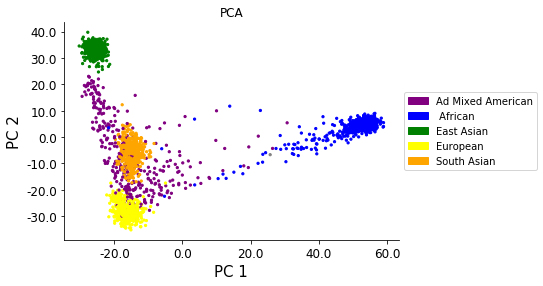

In [21]:
sample_to_pop = {}
with open("/datasets/cs284s-sp20-public/ps2/ps2_reference_labels.csv", "r") as f:
    for line in f:
        sample, pop = line.strip().split(",")
        sample_to_pop[sample] = pop

pop_to_color = pop_to_color = {"ACB": "blue","ASW": "blue", "MSL":"blue","LWK": "blue", "YRI": "blue", "ESN": "blue", "GWD": "blue",
"CDX": "green", "CHB": "green", "CHS": "green", "JPT": "green","KHV": "green",
"CEU": "yellow", "FIN": "yellow", "GBR": "yellow", "IBS": "yellow", "TSI": "yellow",
"CLM": "purple", "MXL": "purple", "PEL": "purple", "PUR": "purple",
"GIH": "orange","ITU": "orange", "BEB": "orange", "STU": "orange", "PJL": "orange",
"None": "gray"
}

if not os.path.exists(os.path.join(os.environ["HOME"], "ps2/", "ps2_pca.samples.txt")):
    samples = []
else: samples = [item.strip() for item in open(os.path.join(os.environ["HOME"], "ps2/", "ps2_pca.samples.txt"), "r").readlines()]
colors = []
for sample in samples:
    pop = sample_to_pop.get(sample, "None")
    color = pop_to_color[pop]
    colors.append(color)

####### Load data you should've generated in steps 1 and 2 #####
pc1 = [0]*len(samples)
pc2 = [0]*len(samples)
# Load PCs
# Below replace lists pc1 and pc2 vectors computed in step 2 above
data_from_file = np.loadtxt("pca_transform_data.txt")
pc1 = data_from_file[:,0]
pc2 = data_from_file[:,1]

plot_cluster(pc1,pc2,"PC 1","PC 2",colors,"PCA")

In [7]:
# import numpy as np
# from sklearn.manifold import TSNE

# data = (np.loadtxt("../PS2/transform_data.txt"))

# perplexity = np.arange(5,105,5)

# for p in perplexity:
#     X_embedded = TSNE(n_components=2,perplexity = p).fit_transform(data)
#     name = "TSNE_perplexity_"+str(p)+".txt"
#     np.savetxt(name,X_embedded)

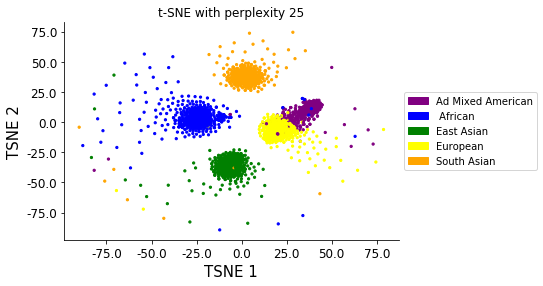

In [23]:
# visualizing t-NSE data
X_embedded = np.loadtxt("TSNE_perplexity_25.txt")
plot_cluster(X_embedded[:,0],X_embedded[:,1],"TSNE 1","TSNE 2",colors,"t-SNE with perplexity 25")